In [33]:
# Step 1: Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Optional: set style for plots
sns.set(style="whitegrid")

In [34]:
# Step 2: Load the dataset

# Replace the file name with the actual dataset file if different
df = pd.read_csv("customer_support_tickets.csv")

# Quick inspection of the dataset
print("Shape of dataset:", df.shape)        # rows and columns
print("\nColumns in dataset:\n", df.columns.tolist())  # column names
print("\nFirst 5 rows:\n")
print(df.head())

# Check basic info about data types and null values
print("\nDataset Info:\n")
print(df.info())

# Quick summary statistics for numerical columns
print("\nSummary Statistics:\n")
print(df.describe())

Shape of dataset: (8469, 17)

Columns in dataset:
 ['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']

First 5 rows:

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Techni

In [35]:
# Step 3: Data Cleaning

# 1. Remove duplicate rows (if any)
df = df.drop_duplicates()

# 2. Handle missing values
# For target variable (Customer Satisfaction Rating) -> drop rows with missing target
df = df.dropna(subset=["Customer Satisfaction Rating"])

# For categorical/text columns -> fill missing with 'Unknown'
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

# For numerical columns -> fill missing with median
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# 3. Convert date columns to datetime (if present in dataset)
date_cols = ["Date of Purchase", "First Response Time", "Time to Resolution"]
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# 4. Re-check missing values after cleaning
print("\nMissing values after cleaning:\n")
print(df.isnull().sum())


Missing values after cleaning:

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64


C:\Users\Sneha\AppData\Local\Temp\ipykernel_7848\3637133941.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Customer Satisfaction Rating", data=df, palette="viridis")


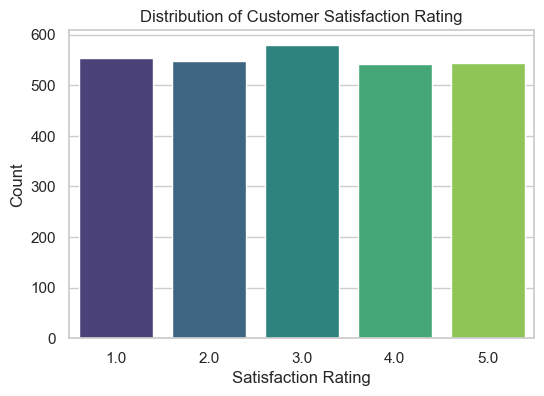

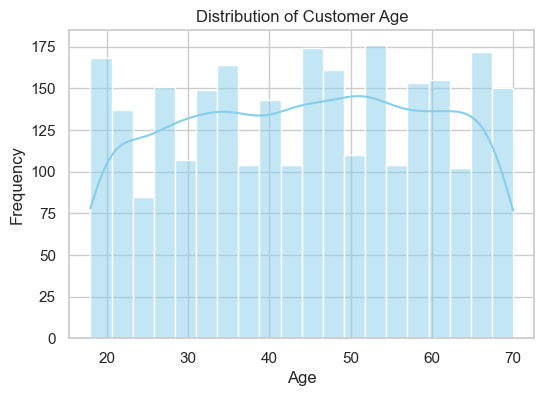

C:\Users\Sneha\AppData\Local\Temp\ipykernel_7848\3637133941.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ticket Type", data=df,


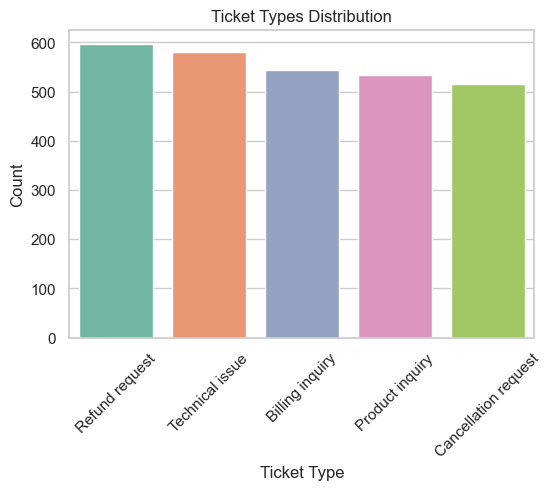

C:\Users\Sneha\AppData\Local\Temp\ipykernel_7848\3637133941.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ticket Channel", data=df,


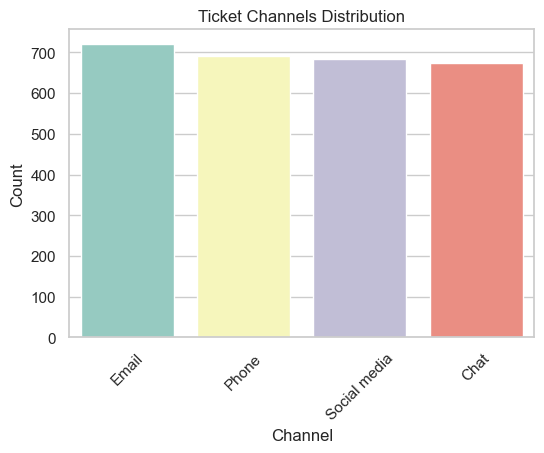

C:\Users\Sneha\AppData\Local\Temp\ipykernel_7848\3637133941.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ticket Priority", data=df,


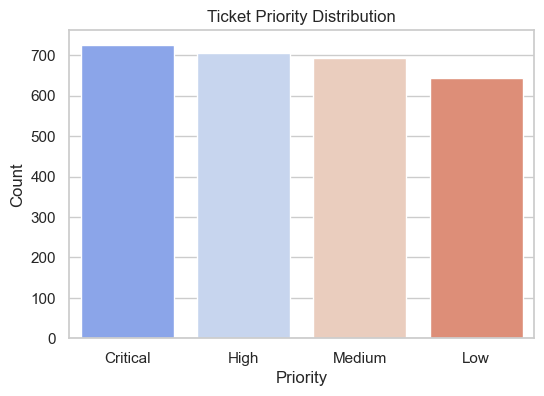

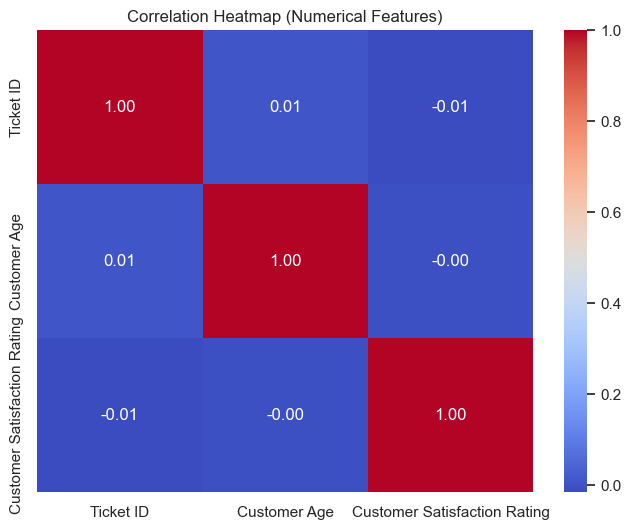

C:\Users\Sneha\AppData\Local\Temp\ipykernel_7848\3637133941.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Customer Satisfaction Rating", y="Customer Age", data=df, palette="Set1")


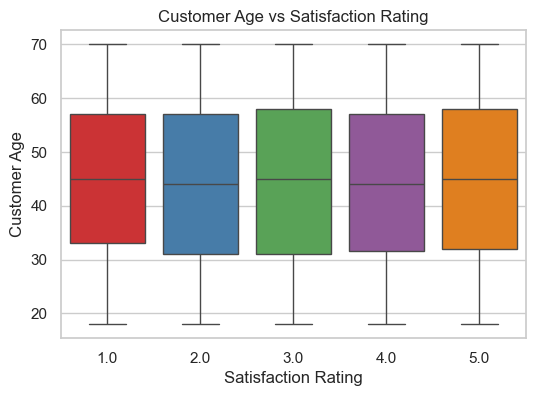

C:\Users\Sneha\AppData\Local\Temp\ipykernel_7848\3637133941.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ticket Priority", y="Customer Satisfaction Rating", data=df, estimator=np.mean, palette="viridis")


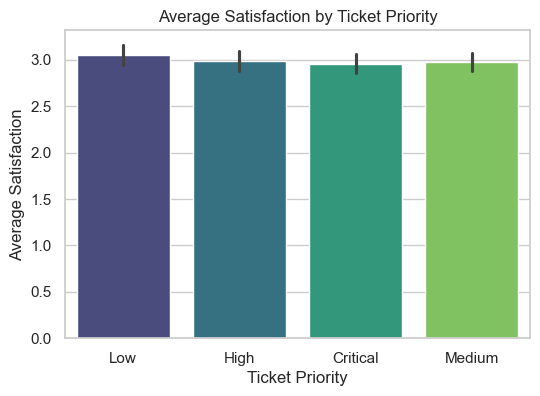

C:\Users\Sneha\AppData\Local\Temp\ipykernel_7848\3637133941.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ticket Channel", y="Customer Satisfaction Rating", data=df, estimator=np.mean, palette="pastel")


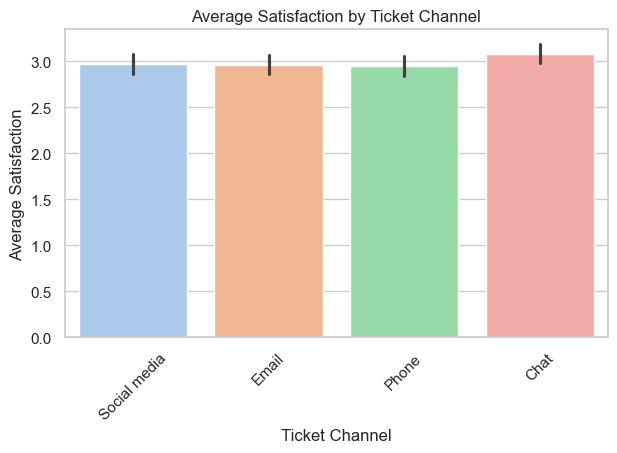

In [36]:
# Step 4: Exploratory Data Analysis (EDA)

# 1. Distribution of the target variable (Customer Satisfaction Rating)
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Satisfaction Rating", data=df, palette="viridis")
plt.title("Distribution of Customer Satisfaction Rating")
plt.xlabel("Satisfaction Rating")
plt.ylabel("Count")
plt.show()

# 2. Distribution of Customer Age
if "Customer Age" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["Customer Age"], bins=20, kde=True, color="skyblue")
    plt.title("Distribution of Customer Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

# 3. Ticket Type distribution
if "Ticket Type" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Ticket Type", data=df,
                  order=df["Ticket Type"].value_counts().index, palette="Set2")
    plt.title("Ticket Types Distribution")
    plt.xlabel("Ticket Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# 4. Ticket Channel distribution
if "Ticket Channel" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Ticket Channel", data=df,
                  order=df["Ticket Channel"].value_counts().index, palette="Set3")
    plt.title("Ticket Channels Distribution")
    plt.xlabel("Channel")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# 5. Ticket Priority distribution
if "Ticket Priority" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Ticket Priority", data=df,
                  order=df["Ticket Priority"].value_counts().index, palette="coolwarm")
    plt.title("Ticket Priority Distribution")
    plt.xlabel("Priority")
    plt.ylabel("Count")
    plt.show()

# 6. Correlation Heatmap (numerical features only)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# 7. Customer Age vs Satisfaction
if "Customer Age" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Customer Satisfaction Rating", y="Customer Age", data=df, palette="Set1")
    plt.title("Customer Age vs Satisfaction Rating")
    plt.xlabel("Satisfaction Rating")
    plt.ylabel("Customer Age")
    plt.show()

# 8. Satisfaction by Ticket Priority
if "Ticket Priority" in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x="Ticket Priority", y="Customer Satisfaction Rating", data=df, estimator=np.mean, palette="viridis")
    plt.title("Average Satisfaction by Ticket Priority")
    plt.xlabel("Ticket Priority")
    plt.ylabel("Average Satisfaction")
    plt.show()

# 9. Satisfaction by Ticket Channel
if "Ticket Channel" in df.columns:
    plt.figure(figsize=(7,4))
    sns.barplot(x="Ticket Channel", y="Customer Satisfaction Rating", data=df, estimator=np.mean, palette="pastel")
    plt.title("Average Satisfaction by Ticket Channel")
    plt.xlabel("Ticket Channel")
    plt.ylabel("Average Satisfaction")
    plt.xticks(rotation=45)
    plt.show()

In [37]:
# Step 5: Feature Engineering & Preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# -------------------------------
# 1. Separate features (X) and target (y)
# -------------------------------
X = df.drop("Customer Satisfaction Rating", axis=1)
y = df["Customer Satisfaction Rating"]

# -------------------------------
# 2. Identify column types
# -------------------------------
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Remove text column (we'll handle separately with TF-IDF)
text_feature = "Ticket Description" if "Ticket Description" in categorical_features else None
if text_feature:
    categorical_features.remove(text_feature)

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)
print("Text feature:", text_feature)

# -------------------------------
# 3. Preprocessing setup
# -------------------------------
# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# If text column exists, apply TF-IDF
if text_feature:
    text_transformer = TfidfVectorizer(max_features=500)  # limit features for efficiency

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
            ("text", text_transformer, [text_feature])  # ✅ list, not string
        ]
    )
else:
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ]
    )

print("\nPreprocessing pipeline ready ✅")

Numeric features: ['Ticket ID', 'Customer Age']
Categorical features: ['Customer Name', 'Customer Email', 'Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel']
Text feature: Ticket Description

Preprocessing pipeline ready ✅


Accuracy: 0.20577617328519857
Classification Report:
               precision    recall  f1-score   support

         1.0       0.17      0.17      0.17       168
         2.0       0.24      0.22      0.23       174
         3.0       0.24      0.26      0.25       175
         4.0       0.19      0.17      0.18       162
         5.0       0.18      0.20      0.19       152

    accuracy                           0.21       831
   macro avg       0.21      0.20      0.20       831
weighted avg       0.21      0.21      0.21       831

Confusion Matrix:
 [[29 41 38 27 33]
 [42 38 34 27 33]
 [37 23 45 34 36]
 [31 27 36 28 40]
 [27 29 36 29 31]]


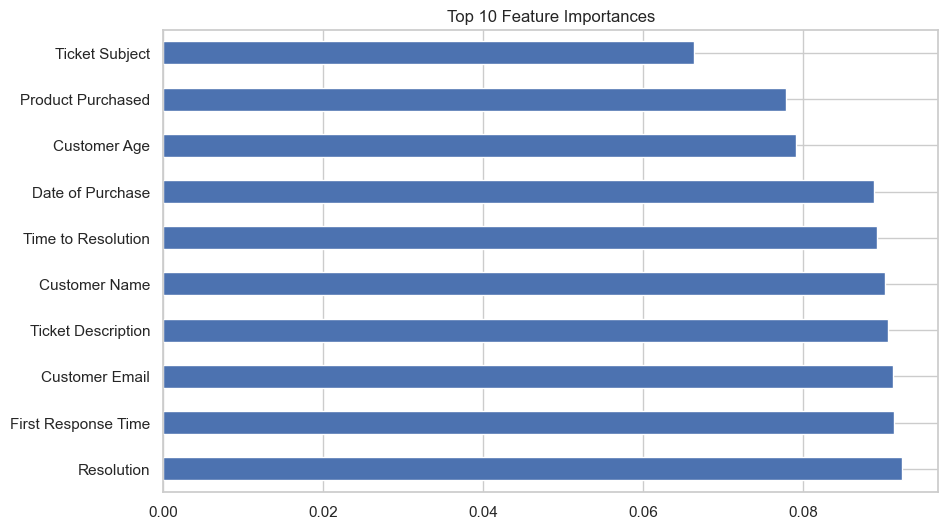

In [40]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Model Training - Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Step 9: Prediction
y_pred = rfc.predict(X_test)

# Step 10: Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 11: Visualization of Feature Importances
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()